In [51]:
#import libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [52]:
df_train = pd.read_csv("train.csv")

In [53]:
df_train.head(10) #sample tail

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [54]:
df_test = pd.read_csv("test.csv")

In [55]:
df_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
191,1083,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S
334,1226,3,"Cor, Mr. Ivan",male,27.0,0,0,349229,7.8958,NaN,S
206,1098,3,"McGowan, Miss. Katherine",female,35.0,0,0,9232,7.7500,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
195,1087,3,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,NaN,S
159,1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.0,0,2,SOTON/O.Q. 3101315,13.7750,NaN,S
105,997,3,"Holthen, Mr. Johan Martin",male,28.0,0,0,C 4001,22.5250,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
382,1274,3,"Risien, Mrs. Samuel (Emma)",female,NaN,0,0,364498,14.5000,NaN,S
120,1012,2,"Watt, Miss. Bertha J",female,12.0,0,0,C.A. 33595,15.7500,NaN,S


In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [58]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
#Remove not required columns

df_train.drop(['PassengerId','Cabin', 'Ticket'], axis=1, inplace = True)
df_test.drop(['PassengerId','Cabin', 'Ticket'], axis=1, inplace = True)

In [60]:
#null values in train data 
print('Null values in train data',df_train.isnull().sum())


print('***********************************************************************')
#null values in test data 

print('Null values in train data',df_test.isnull().sum())

Null values in train data Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
***********************************************************************
Null values in train data Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [61]:
#Handling missing values in Train dataset 
df_train['Age'].fillna(df_train['Age'].median(), inplace = True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)
df_train['Fare'].fillna(df_train['Fare'].median(), inplace = True)

In [62]:
#handling missing values in Test dataset
df_test['Age'].fillna(df_test['Age'].median(), inplace = True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace = True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace = True)

In [63]:
#null values in train data 
print('Null values in train data',df_train.isnull().sum())


print('***********************************************************************')
#null values in test data 

print('Null values in train data',df_test.isnull().sum())

Null values in train data Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
***********************************************************************
Null values in train data Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [65]:
#feature engineering ---- 

df_train['FamilySize'] = df_train ['SibSp'] + df_train['Parch'] + 1
df_train['IsAlone'] = 1
df_train['IsAlone'].loc[df_train['FamilySize'] > 1] = 0
df_train['Title'] = df_train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df_train['FareBin'] = pd.qcut(df_train['Fare'], 4)
df_train['AgeBin'] = pd.cut(df_train['Age'].astype(int), 5)




df_test['FamilySize'] = df_test ['SibSp'] + df_test['Parch'] + 1
df_test['IsAlone'] = 1
df_test['IsAlone'].loc[df_test['FamilySize'] > 1] = 0
df_test['Title'] = df_test['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df_test['FareBin'] = pd.qcut(df_test['Fare'], 4)
df_test['AgeBin'] = pd.cut(df_test['Age'].astype(int), 5)


C:\Users\Pawan\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Pawan\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [67]:
df_train['FareBin']

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
5       (7.91, 14.454]
6      (31.0, 512.329]
7       (14.454, 31.0]
8       (7.91, 14.454]
9       (14.454, 31.0]
10      (14.454, 31.0]
11      (14.454, 31.0]
12      (7.91, 14.454]
13     (31.0, 512.329]
14      (-0.001, 7.91]
15      (14.454, 31.0]
16      (14.454, 31.0]
17      (7.91, 14.454]
18      (14.454, 31.0]
19      (-0.001, 7.91]
20      (14.454, 31.0]
21      (7.91, 14.454]
22      (7.91, 14.454]
23     (31.0, 512.329]
24      (14.454, 31.0]
25     (31.0, 512.329]
26      (-0.001, 7.91]
27     (31.0, 512.329]
28      (-0.001, 7.91]
29      (-0.001, 7.91]
            ...       
861     (7.91, 14.454]
862     (14.454, 31.0]
863    (31.0, 512.329]
864     (7.91, 14.454]
865     (7.91, 14.454]
866     (7.91, 14.454]
867    (31.0, 512.329]
868     (7.91, 14.454]
869     (7.91, 14.454]
870     (-0.001, 7.91]
871    (31.0, 512.329]
872     (-0.001, 7.91]
873     (7.

In [68]:
title = df_train.groupby('Title').size().sort_values().reset_index()
title.columns = ['Title','cnt']


In [69]:
title

,Title,cnt
0,Capt,1
1,Ms,1
2,Mme,1
3,Sir,1
4,Lady,1
5,the Countess,1
6,Don,1
7,Jonkheer,1
8,Major,2
9,Mlle,2


In [74]:
title = title[title['cnt']>10].iloc[:,0]


KeyError: 'cnt'

In [75]:
title

13    Master
14       Mrs
15      Miss
16        Mr
Name: Title, dtype: object

In [76]:
df_train = df_train[df_train.Title.isin(title)]

In [77]:
datasets = [df_train,df_test]

In [78]:
label = LabelEncoder()
for dataset in datasets:   
    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [21]:
df_train 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,2,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,3,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,3,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,2,2,1
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]",1,1,2,1,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1,1,Mr,"(31.0, 512.329]","(48.0, 64.0]",1,2,2,3,3
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,5,0,Master,"(14.454, 31.0]","(-0.08, 16.0]",1,2,0,0,2
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3,0,Mrs,"(7.91, 14.454]","(16.0, 32.0]",0,2,3,1,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,2,0,Mrs,"(14.454, 31.0]","(-0.08, 16.0]",0,0,3,0,2


In [79]:
#get the all the independent variable

all_features = df_train.columns.tolist()
x_features = all_features.copy()
x_features.remove('Survived')
x_features.remove('Name')

In [80]:
for x in x_features:
    if df_train[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(df_train[[x, 'Survived']].groupby(x, as_index=False).mean())
        print('*'*50, '\n')

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.631313
1       2  0.491429
2       3  0.242363
************************************************** 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.736156
1    male  0.186715
************************************************** 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.342419
1      1  0.536585
2      2  0.461538
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
************************************************** 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.338438
1      1  0.560345
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
************************************************** 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.540881
1        Q  0.400000
2        S  0.339683
************************************************** 

Survival Correlation by: FamilySize
   FamilySize 

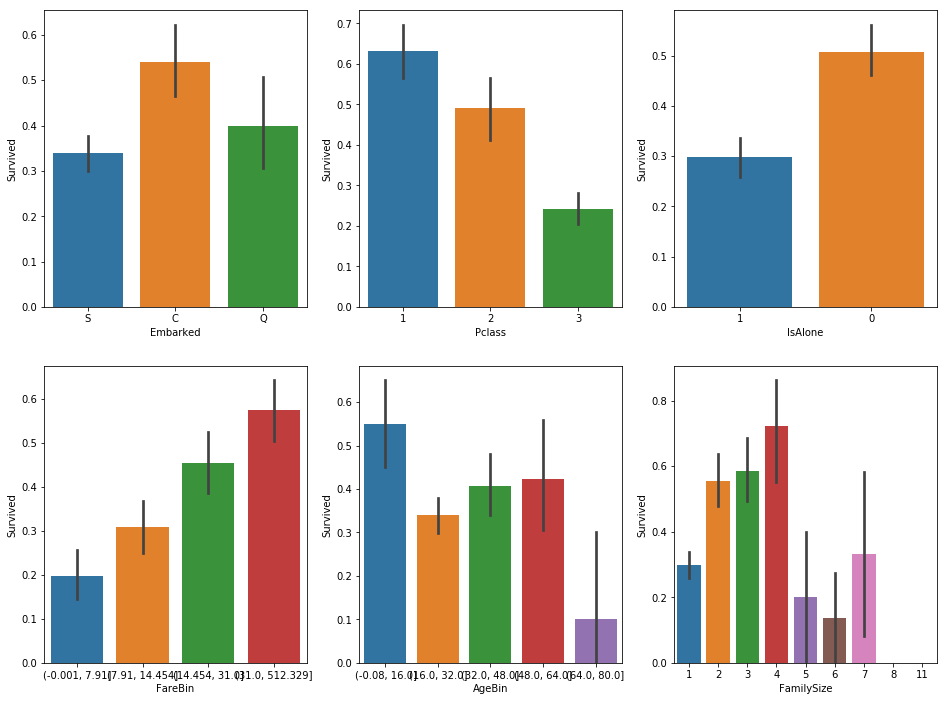

In [81]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=df_train, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=df_train, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=df_train, ax = saxis[0,2])
sns.barplot(x = 'FareBin', y = 'Survived',  data=df_train, ax = saxis[1,0])
sns.barplot(x = 'AgeBin', y = 'Survived',  data=df_train, ax = saxis[1,1])
sns.barplot(x = 'FamilySize', y = 'Survived', data=df_train, ax = saxis[1,2])

In [82]:
corr = df_train.corr()

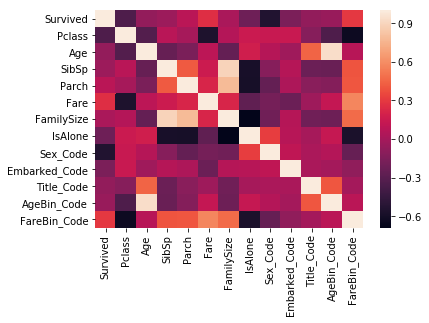

In [83]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)#,cmap="YlGnBu")
#_ , ax = plt.subplots(figsize =(14, 12)) #colormap = sns.diverging_palette(220, 10, as_cmap = True) #sns.heatmap( corr, cmap = colormap, square=True, cbar_kws={'shrink':.9 }, ax=ax, annot=True, linewidths=0.1,vmax=1.0, linecolor='white', annot_kws={'fontsize':12 } )

In [84]:
final_feature = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
#df_train

###
#df_train = df_train[final_feature]
#X = pd.get_dummies(df_train)
#X = pd.get_dummies(df_train, columns=final_feature)

In [88]:
x_train,x_test,y_train,y_test = train_test_split(df_train[final_feature],df_train['Survived'],test_size = .25, random_state = 24)

In [89]:
log_regr = LogisticRegression()
log_regr = log_regr.fit(x_train,y_train)

In [90]:
log_regr.score(x_test,y_test)

0.7268518518518519

In [91]:
###
df_train = df_train[final_feature]
X = pd.get_dummies(df_train)
#X = pd.get_dummies(df_train, columns=final_feature)

In [92]:
X

,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
0,1,3,2,2,2,1,0
1,0,1,0,3,2,2,3
2,0,3,2,1,1,1,1
3,0,1,2,3,2,2,3
4,1,3,2,2,1,2,1
5,1,3,1,2,1,1,1
6,1,1,2,2,1,3,3
7,1,3,2,0,5,0,2
8,0,3,2,3,3,1,1
9,0,2,0,3,2,0,2
